In [12]:
import pandas as pd
import numpy as np

In [13]:
# Load local .csv file as DataFrame
df = pd.read_csv('Twitter_stock_final_dataset.csv')
# Inspect the data
print(df.head())

   Year  Month  Day  StockName  Positive  Negative  Neutral  Total Tweets  \
0  2020      1    1      apple        10         2        8            20   
1  2020      1    1  microsoft         9         0       11            20   
2  2020      1    1      tesla        17         3        3            23   
3  2020      1    1     nvidia         1         0        0             1   
4  2020      1    1     paypal         1         0        1             2   

      Close       Volume      Open      High       Low Day_of_week  
0   75.0875  135647440.0   74.0600   75.1500   73.7975   Wednesday  
1  160.6200   22634550.0  158.7800  160.7300  158.3300   Wednesday  
2   86.0520   47791930.0   84.9000   86.1391   84.3420   Wednesday  
3   59.9775   23767876.0   59.6875   59.9775   59.1800   Wednesday  
4  110.7500    7419283.0  109.4700  111.2100  109.2750   Wednesday  


In [14]:
# Show some summary statistics
print('\n Shape of the data:')
print(df.shape)


 Shape of the data:
(2983, 14)


Step 2: Prepare the data
Before we start developing our regression model we are going to trim our data some. The ‘Date’ column will be converted to a DatetimeIndex and the ‘Adj Close’ will be the only numerical values we keep. Everything else is getting dropped.

In [8]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='adj_close', length=10, append=True)

[X] Ooops!!! It's True, the series 'adj_close' was not found in Year, Month, Day, StockName, Positive, Negative, Neutral, Total Tweets, Close, Volume, Open, High, Low, Day_of_week


,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [29]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [23]:
dataset_train = pd.read_csv("Twitter_stock_final_dataset.csv")
dataset_train.head()


,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [24]:
training_set = dataset_train.iloc[:, 1: 2] .values
print(training_set)
print(training_set. shape)

[[1]
 [1]
 [1]
 ...
 [9]
 [9]
 [9]]
(2983, 1)


In [30]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.72727273],
       [0.72727273],
       [0.72727273]])

In [33]:
x_train=[]
y_train=[]
for i in range (60,2983):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [34]:
print(x_train.shape)
print(y_train.shape)

(2923, 60)
(2923,)


In [35]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2923, 60, 1)

In [36]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))


In [38]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
92/92 [==============================] - 9s 55ms/step - loss: 0.0158
Epoch 2/100
92/92 [==============================] - 5s 55ms/step - loss: 0.0067
Epoch 3/100
92/92 [==============================] - 5s 55ms/step - loss: 0.0063
Epoch 4/100
92/92 [==============================] - 5s 55ms/step - loss: 0.0055
Epoch 5/100
92/92 [==============================] - 5s 56ms/step - loss: 0.0054
Epoch 6/100
92/92 [==============================] - 5s 55ms/step - loss: 0.0049
Epoch 7/100
92/92 [==============================] - 5s 56ms/step - loss: 0.0046
Epoch 8/100
92/92 [==============================] - 5s 56ms/step - loss: 0.0039
Epoch 9/100
92/92 [==============================] - 5s 56ms/step - loss: 0.0042
Epoch 10/100
92/92 [==============================] - 5s 57ms/step - loss: 0.0038
Epoch 11/100
92/92 [==============================] - 5s 57ms/step - loss: 0.0037
Epoch 12/100
92/92 [==============================] - 5s 57ms/step - loss: 0.0034
Epoch 13/100
92/92 [=====

In [41]:
dataset_test=pd.read_csv("Twitter_stock_final_dataset.csv")
actual_stock_price=dataset_train.iloc[:,1:2].values

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test =[]
for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [43]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

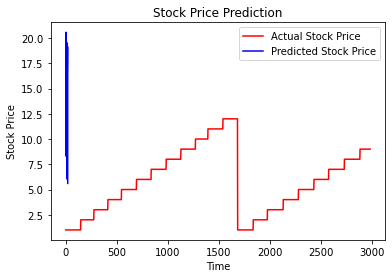

In [44]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label ='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price' )
plt.legend()